# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
try:
    data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
except: 
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [5]:
data.last_price.describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

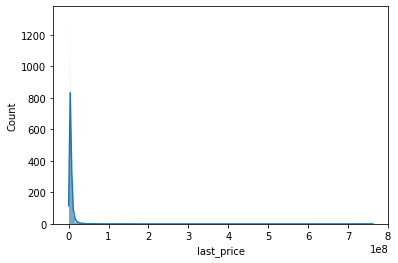

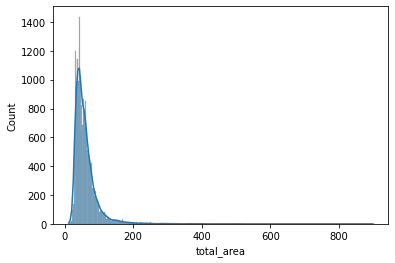

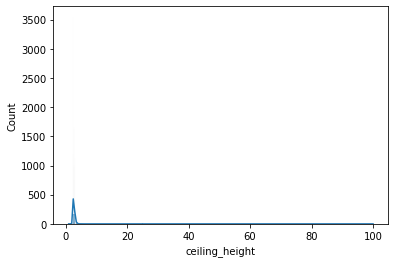

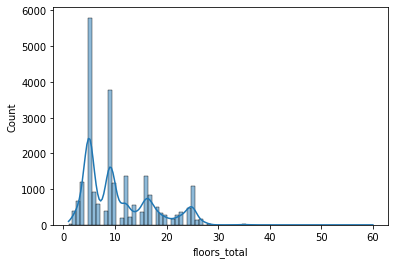

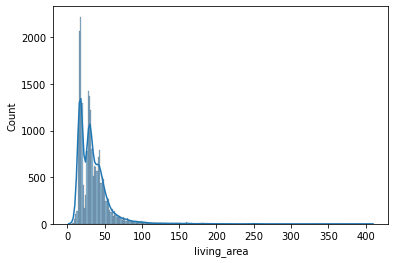

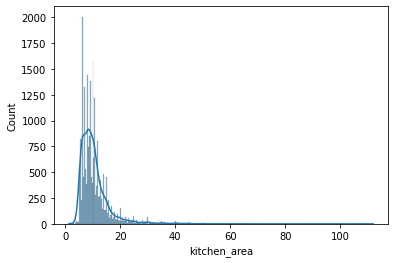

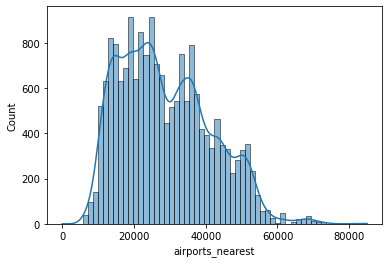

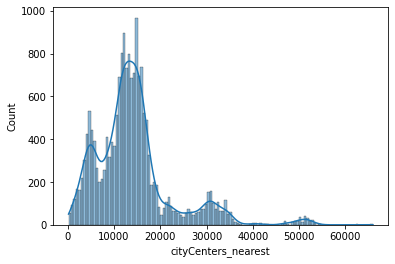

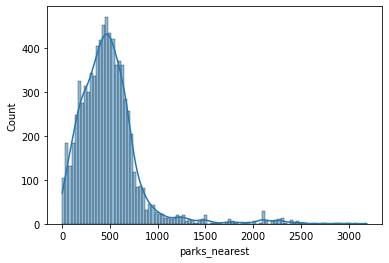

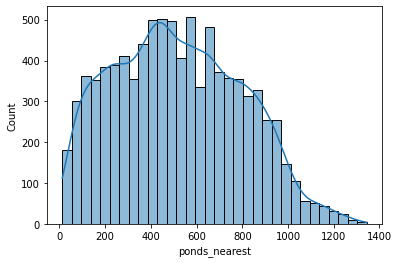

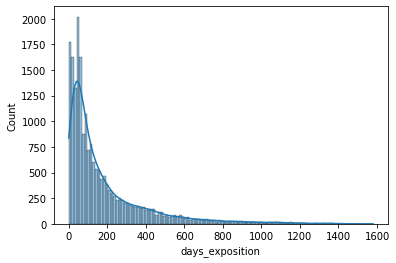

In [6]:
numeric_cols = []
for col in data.columns:
    if data[col].dtype == 'float64' and col not in ['parks_around3000', 'ponds_around3000', 'balcony']:
        numeric_cols.append(col)
        
for col in numeric_cols:
    sns.histplot(data[col], kde=True)
    plt.show()

<AxesSubplot:>

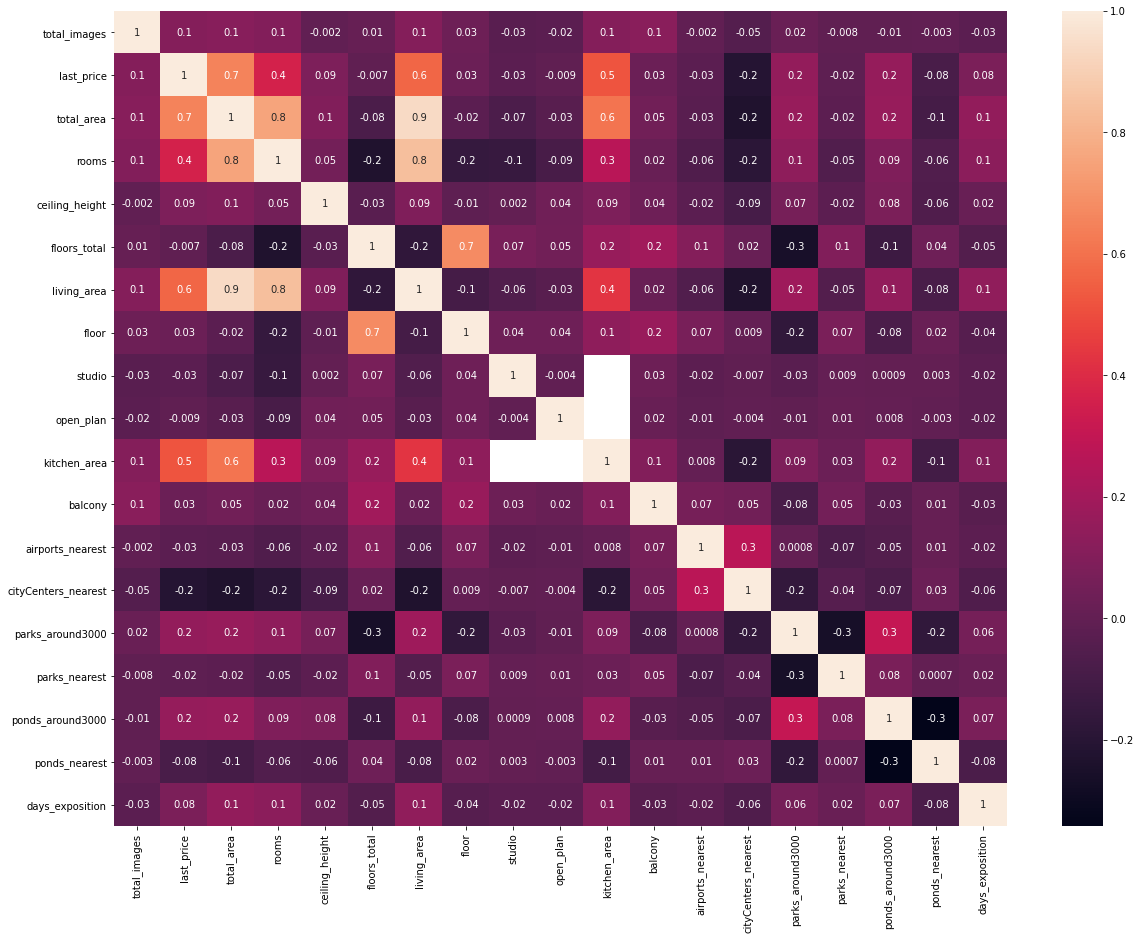

In [7]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), fmt='.1g', annot=True)

**Выводы**: 
1. Много пропусков, как по столбцам, так и по строкам.
2. Дорогое (или элитное) жилье будем рассматривать как выброс из-за того, что таких объектов мало и цены на подобно жилье формируются по другим факторам.
3. Средняя прямая корреляция между ценой и площадью квартиры ("total_area", "living_area", 'kitchen_area ), а также слабая прямая между ценой и количеством комнат.

### Предобработка данных

In [8]:
data_not_nan = data

#### Отсекаем выбросы

In [9]:
# outlier_dict = {
#     'last_price': [0, 0.9],
#     'total_images' : [0, 0.95], 
#     'total_area' : [0, 0.95],
#     'living_area' : [0.05, 0.95],
#     'kitchen_area': [0.05, 0.95], 
#     'ceiling_height' : [0.05, 0.95],
#     'cityCenters_nearest' : [0.05, 0.95],
#     'parks_nearest' : [0.05, 0.95]
# }
# for col in outlier_dict.items():
#     print(col[1][1])
#     data_not_nan = data_not_nan.query('@data_not_nan.@col[0].quantile([col[1][0]]).to_list() \
# <= @col[0] <= @data_not_nan.@col.quantile([col[1][1]).to_list() or @col[0].isnull()')

In [10]:
# data_not_nan = data_not_nan.query('last_price <= @data_not_nan.last_price.quantile([0.95]).to_list()')
# data_not_nan = data_not_nan.query('total_images <= @data_not_nan.total_images.quantile([0.95]).to_list()')
# data_not_nan = data_not_nan.query('15 <= total_area <= @data_not_nan.total_area.quantile([0.97]).to_list()')
# data_not_nan = data_not_nan.query('10 <=living_area <= @data_not_nan.living_area.quantile([0.97]).to_list()')
# data_not_nan = data_not_nan.query('4 <= kitchen_area <= @data_not_nan.kitchen_area.quantile([0.97]).to_list()')
# data_not_nan = data_not_nan.query('2.4 <= ceiling_height <= @data_not_nan.ceiling_height.quantile([0.95]).to_list() or ceiling_height.isnull()')
# data_not_nan = data_not_nan.query('cityCenters_nearest <= @data_not_nan.cityCenters_nearest.quantile([0.97]).to_list() or cityCenters_nearest.isnull()')
# data_not_nan = data_not_nan.query('parks_nearest <= @data_not_nan.parks_nearest.quantile([0.95]).to_list() or parks_nearest.isnull()')
# data_not_nan = data_not_nan.query('floors_total <= @data_not_nan.floors_total.quantile([0.95]).to_list() or floors_total.isnull()')
# data_not_nan = data_not_nan.query('airports_nearest<= @data_not_nan.airports_nearest.quantile([0.99]).to_list() or airports_nearest.isnull()')

In [11]:
data_not_nan = data_not_nan.query('last_price <= 10000000')
data_not_nan = data_not_nan.query('15 <= total_area <= 86')
data_not_nan = data_not_nan.query('10 <=living_area <= 52 or living_area.isnull()')
data_not_nan = data_not_nan.query('4 <= kitchen_area <= 15.5 or kitchen_area.isnull()')
data_not_nan = data_not_nan.query('2.4 <= ceiling_height <= 3 or ceiling_height.isnull()')
data_not_nan = data_not_nan.query('cityCenters_nearest <= 31262 or cityCenters_nearest.isnull()')
data_not_nan = data_not_nan.query('parks_nearest <= 796.0 or parks_nearest.isnull()')
data_not_nan = data_not_nan.query('floors_total <= 24 or floors_total.isnull()')
data_not_nan = data_not_nan.query('airports_nearest<= 52480 or airports_nearest.isnull()')

#### Обработка пропусков

Попробуем предсказать пропущенные значения в столбце "высота потолков".

In [12]:
ceiling_cols = []
for col in data_not_nan.columns:
    if data_not_nan[col].isnull().sum() == 0 and col not in ['first_day_exposition'] or col == 'ceiling_height':
        ceiling_cols.append(col)

data_ceiling = data_not_nan[ceiling_cols]
train = data_ceiling.loc[data_ceiling.ceiling_height.isnull() == False]
test = data_ceiling.loc[data_ceiling.ceiling_height.isnull() == True]

y_train = train.ceiling_height
X_train = train.drop('ceiling_height', axis=1)
X_test = test.drop('ceiling_height', axis=1)

import xgboost as xgb
params = {'n_estimators': 10,#чтобы быстрее считало
          'learning_rate': 0.1,
          'max_depth': 3,
          'min_child_weight': 1,
          'subsample': 1,
          'colsample_bytree': 1,
          'n_jobs': -1}

clf_xgb = xgb.XGBClassifier(**params)
clf_xgb.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

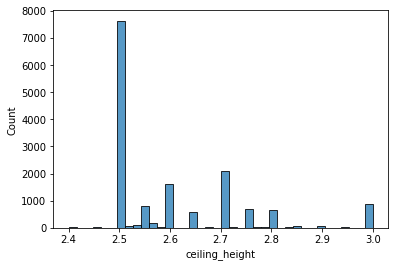

<AxesSubplot:xlabel='ceiling_height', ylabel='Count'>

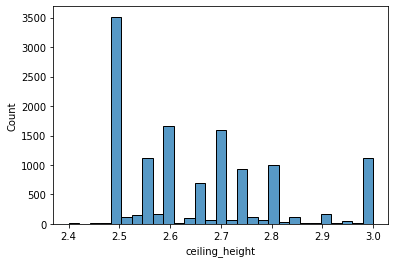

In [13]:
data_not_nan.ceiling_height.fillna(pd.Series(clf_xgb.predict(X_test), index = X_test.index), inplace=True)
sns.histplot(data_not_nan.ceiling_height)
plt.show()
sns.histplot(data.query('2.4<=ceiling_height <= 3').ceiling_height)

Судя по гистограммам алгоритм увеличил частоты наиболее встречающихся значений, в отличие от медианы которая увеличивает частоту одного значения, получается просто пик. <p>**Примечание**. Классификация, а не регрессия поскольку высота потолков категориальная переменная. Дома обычно имеют типовые значения высоты потолков</p>

Запоняем пропуски в столбцах "всего этажей в доме", "площадь кухни" медианными значениями.


In [14]:
#data_not_nan.ceiling_height.fillna(data_not_nan.ceiling_height.median(), inplace=True)
data_not_nan.floors_total.fillna(data_not_nan.floors_total.median(), inplace=True)
data_not_nan.kitchen_area.fillna(data_not_nan.kitchen_area.median(), inplace=True)
# data_not_nan.cityCenters_nearest.fillna(data_not_nan.cityCenters_nearest.median(), inplace=True)

Пропуски в столбце "жилая площадь в квадратных метрах" запоняем медианными значениями в каждой из категорий по количеству комнат.

In [15]:
data_not_nan.living_area = data_not_nan.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))

Предположим, что пропуски в столбце "апартаменты" означают, что апартаментами эти объекты не являются.

In [16]:
data_not_nan.is_apartment.fillna(data_not_nan.is_apartment.value_counts().keys()[0], inplace=True)

Пропуски в столбцах "число балконов", "число парков в радиусе 3 км", "число водоёмов в радиусе 3 км" скорее всего означают отсутствие балконов, парков и водоемов у этих объектов.

In [17]:
data_not_nan.balcony.fillna(0, inplace=True)
data_not_nan.ponds_around3000.fillna(0, inplace=True)
data_not_nan.parks_around3000.fillna(0, inplace=True)

* Пропуски в столбце "сколько дней было размещено объявление" скорее всего означают, что объявления не сняты до даты выгрузки базы данных, а значит заполняем их разницей даты выгрузки и дат из столбца "дата публикации". 
* Столбец "дата публикации" для этого преобразуем в формат даты.

In [18]:
data_not_nan.first_day_exposition = pd.to_datetime(data_not_nan.first_day_exposition)

In [19]:
data_not_nan.days_exposition.fillna((
    data_not_nan.first_day_exposition.max() - data_not_nan.first_day_exposition), inplace=True)
data_not_nan.days_exposition = data_not_nan.days_exposition.astype('string').str.split(' ', expand=True)[0]
data_not_nan.days_exposition = data_not_nan.days_exposition.astype('float64').astype('int64')

In [20]:
data_not_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15868 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          15868 non-null  int64         
 1   last_price            15868 non-null  float64       
 2   total_area            15868 non-null  float64       
 3   first_day_exposition  15868 non-null  datetime64[ns]
 4   rooms                 15868 non-null  int64         
 5   ceiling_height        15868 non-null  float64       
 6   floors_total          15868 non-null  float64       
 7   living_area           15868 non-null  float64       
 8   floor                 15868 non-null  int64         
 9   is_apartment          15868 non-null  bool          
 10  studio                15868 non-null  bool          
 11  open_plan             15868 non-null  bool          
 12  kitchen_area          15868 non-null  float64       
 13  balcony         

#### Изменения типов данных

* Количество балконов, этажей, парков и водоемов являеются целыми (не отрицательным) числами.
* Столбец "аппартаменты" указывает на то, является объект аппартаментами или нет, поэтому преобразуем в булевый тип данных.
* Столбец "последняя цена" округляем и преобразуем в int, т.к. доля рубля пренебрежима мала в сравнении с оьщей ценой на квартиру.

In [21]:
data_not_nan.last_price = data_not_nan.last_price.round()
data_not_nan = data_not_nan.astype({
                    'floors_total' : 'int64', 
                    'is_apartment' : 'bool',
                    'balcony' : 'int64', 
                    'parks_around3000' : 'int64',
                    'ponds_around3000' : 'int64',
                    'last_price' : 'int64'
                   })

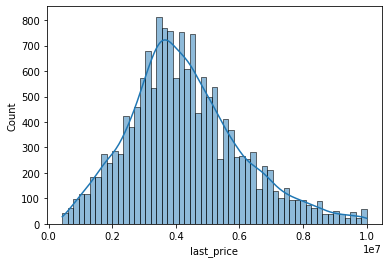

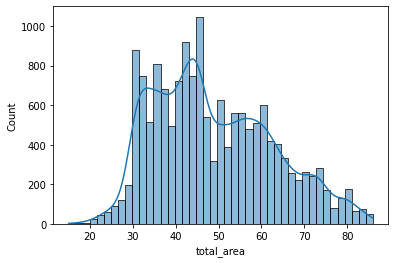

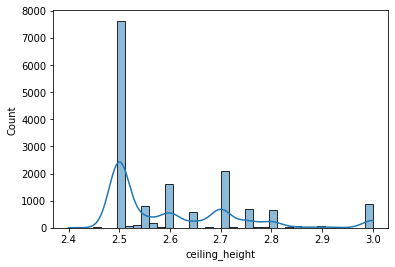

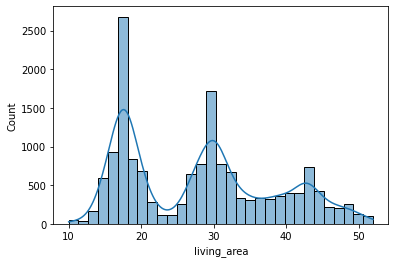

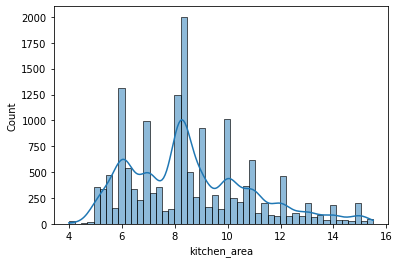

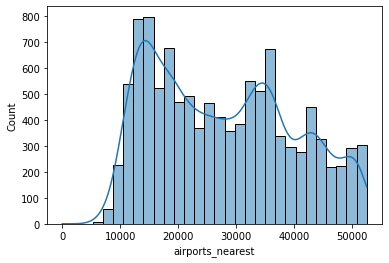

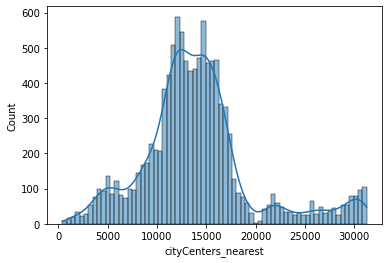

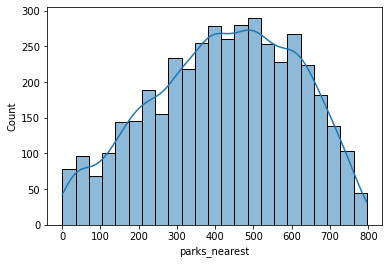

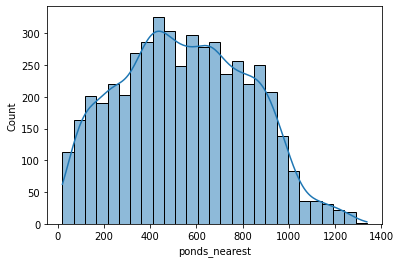

In [22]:
numeric_cols = []
for col in data_not_nan.columns:
    if data_not_nan[col].dtype == 'float64' or col =='last_price':
        numeric_cols.append(col)
        
for col in numeric_cols:
    sns.histplot(data_not_nan[col], kde=True)
    plt.show()

#### Убираем неявные дубликаты

In [23]:
data_not_nan.locality_name.unique()

array(['посёлок Шушары', 'Санкт-Петербург', 'городской посёлок Янино-1',
       'Сертолово', 'Пушкин', 'Коммунар',
       'поселок городского типа Красный Бор', 'посёлок Мурино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'Сланцы', 'село Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Колпино', 'поселок Новый Свет', 'деревня Кудрово',
       'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
      

In [24]:
data_not_nan.locality_name = data_not_nan.locality_name.str.lower().replace({'ё':'е', 'поселок городского типа': 'поселок'})

In [25]:
data_not_nan.drop_duplicates(inplace=True)

### Посчитайте и добавьте в таблицу новые столбцы

In [26]:
data_not_nan['price_per_meter'] = data_not_nan.last_price / data_not_nan.total_area 
data_not_nan['day_of_week_exposition'] = data_not_nan.first_day_exposition.dt.day_of_week
data_not_nan['month_exposition'] = data_not_nan.first_day_exposition.dt.month
data_not_nan['year_exposition'] = data_not_nan.first_day_exposition.dt.year
data_not_nan.first_day_exposition.astype('datetime64[M]')

1       2018-12-01
2       2015-08-01
5       2018-09-01
9       2017-02-01
10      2017-11-01
           ...    
23690   2018-07-01
23692   2017-07-01
23695   2018-01-01
23696   2018-02-01
23698   2017-07-01
Name: first_day_exposition, Length: 15868, dtype: datetime64[ns]

In [27]:
def get_floors_cat(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

In [28]:
data_not_nan['floor_type'] = data_not_nan.apply(get_floors_cat, axis=1)
data_not_nan['cityCenters_nearest_km'] = data_not_nan.cityCenters_nearest / 1000
data_not_nan.cityCenters_nearest_km = data_not_nan.cityCenters_nearest_km.round()

### Проведите исследовательский анализ данных

In [29]:
data_research = data_not_nan

<AxesSubplot:xlabel='last_price', ylabel='Count'>

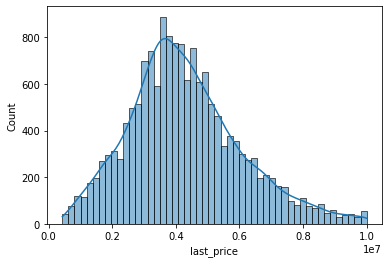

In [30]:
sns.histplot(data_research['last_price'], kde=True, bins=50)

Распределение цен близко к нормальному.

<AxesSubplot:xlabel='total_area', ylabel='Count'>

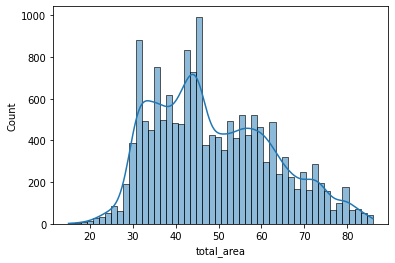

In [31]:
sns.histplot(data_research['total_area'], kde=True, bins=50)

Больше всего квартир с общей площадью в диапазоне от 30 до 45 
$м^2$

<AxesSubplot:xlabel='living_area', ylabel='Count'>

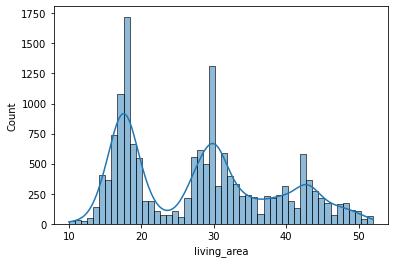

In [32]:
sns.histplot(data_research['living_area'], kde=True, bins=50)

Больше всего квартир с жилой площадью в районе 18 и 30 $м^2$

<AxesSubplot:xlabel='kitchen_area', ylabel='Count'>

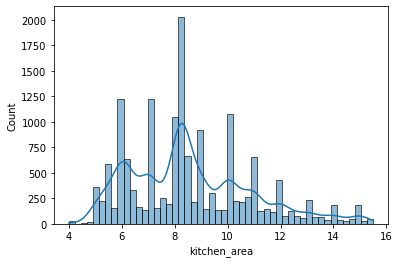

In [33]:
sns.histplot(data_research['kitchen_area'], kde=True, bins=50)

<AxesSubplot:xlabel='rooms', ylabel='Count'>

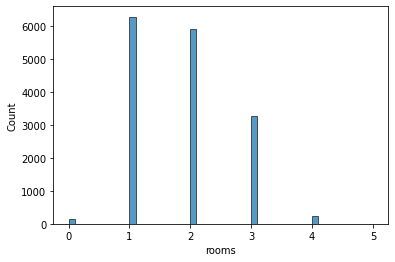

In [34]:
sns.histplot(data_research['rooms'], bins=50)

Больше всего 1 и 2 комнатных квартир

<AxesSubplot:xlabel='ceiling_height', ylabel='Count'>

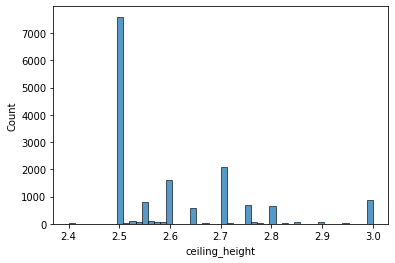

In [35]:
sns.histplot(data_research['ceiling_height'], bins=50)

Наибольшее число квартир с типовым потолком 2,5 м

<AxesSubplot:xlabel='floor', ylabel='Count'>

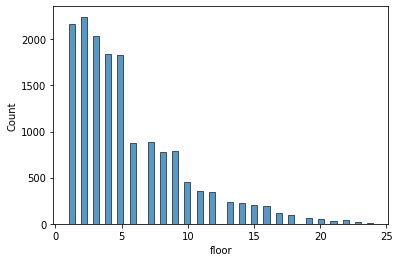

In [36]:
sns.histplot(data_research['floor'], bins=50)

Наибольшее число квартир располагаются на первых 5 этажах (большой вклад видимо вносит большое количество пятиэтажек, это также видно из гистограммы параметра "всего этажей")

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='Count'>

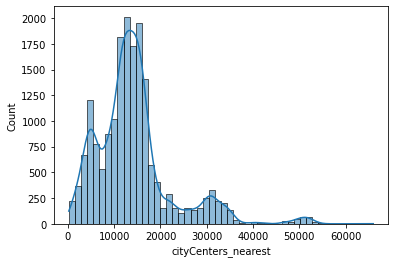

In [37]:
sns.histplot(data['cityCenters_nearest'], kde=True, bins=50)

Квартиры в основном распалагаются на окраинах города (но в его черте).

<AxesSubplot:xlabel='airports_nearest', ylabel='Count'>

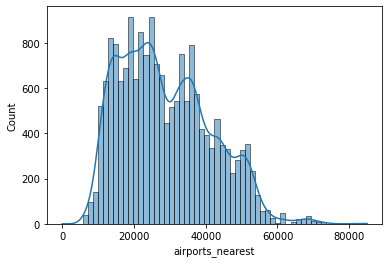

In [38]:
sns.histplot(data['airports_nearest'], kde=True)

Бо́льшая часть квартир располагается в диапазоне от 15 до 50 км от аэропорта. Достаточно далеко.

<AxesSubplot:xlabel='parks_nearest', ylabel='Count'>

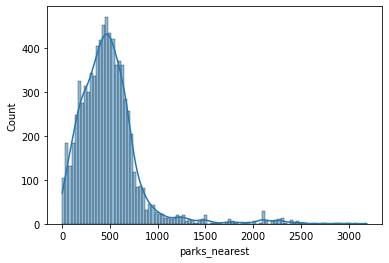

In [39]:
sns.histplot(data['parks_nearest'], kde=True)

У подавляющего числа квартир парк располагается в пределах 1 км.

<AxesSubplot:xlabel='floor_type', ylabel='Count'>

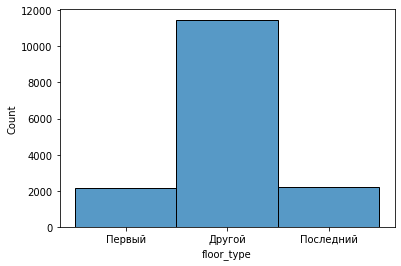

In [40]:
sns.histplot(data_research['floor_type'])

Преобладает тип 'другой'. Говорит в среднем о городской застройке.

<AxesSubplot:xlabel='floors_total', ylabel='Count'>

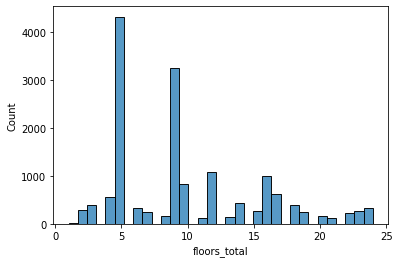

In [41]:
sns.histplot(data_research['floors_total'])

5 и 9 этажки все еще доминируют.

<AxesSubplot:xlabel='month_exposition', ylabel='Count'>

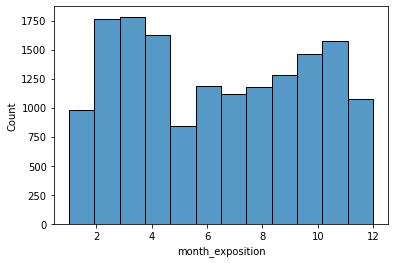

In [42]:
sns.histplot(data_research.month_exposition, bins=12)

Чаще всего объявления публикуют феврале, марте и апреле. Реже всего в мае, декабре, январе (видимо связано с майскими и новогодними праздниками). Также спад происходит летом (видимо связано с отпусками)

<AxesSubplot:xlabel='day_of_week_exposition', ylabel='Count'>

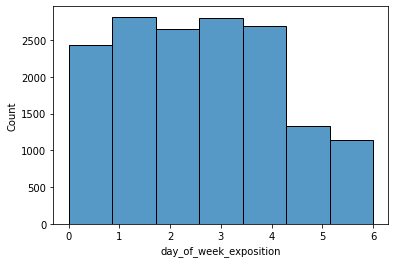

In [43]:
sns.histplot(data_research.day_of_week_exposition, bins=7)

Чаще всего объявления публикуют по будням.

#### Задание 1

Среднее время размещения объявлений: 165 дней
Медианное время размещения объявлений: 84 дней


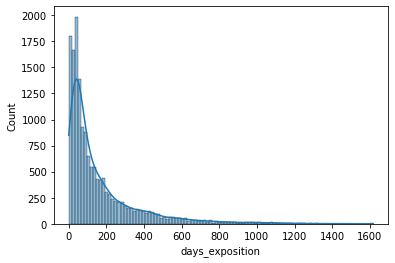

In [44]:
sns.histplot(data_not_nan.days_exposition, kde=True, bins=100)
print(f'Среднее время размещения объявлений: {data_not_nan.days_exposition.mean():.0f} дней')
print(f'Медианное время размещения объявлений: {data_not_nan.days_exposition.median():.0f} дней')

**Выводы:**
* Большинство квартир продаются в первые 3 месяца. 
* Чем дольше висит объявление, тем меньше шансов, что квартира будет продана.

#### Задание 2

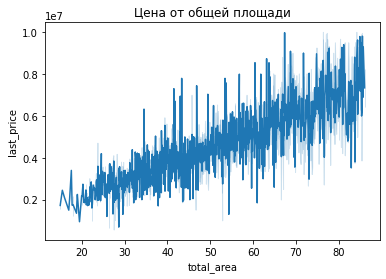

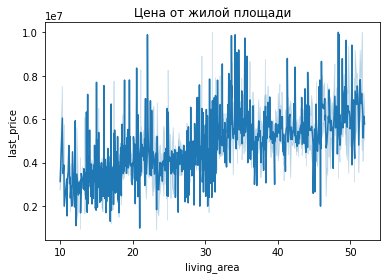

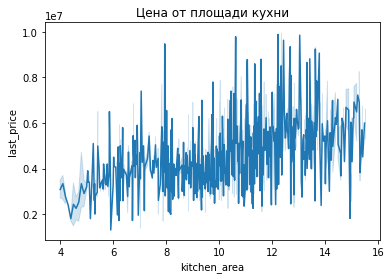

In [45]:
ax = plt.axes()
sns.lineplot(x=data_research.total_area, y=data_research.last_price, ax=ax)
ax.set_title('Цена от общей площади')
plt.show()

ax = plt.axes()
sns.lineplot(x=data_research.living_area, y=data_research.last_price, ax=ax)
ax.set_title('Цена от жилой площади')
plt.show()

ax = plt.axes()
sns.lineplot(x=data_research.kitchen_area, y=data_research.last_price, ax=ax)
ax.set_title('Цена от площади кухни')
plt.show()

Коэффициент корреляции Пирсона: 0.5814


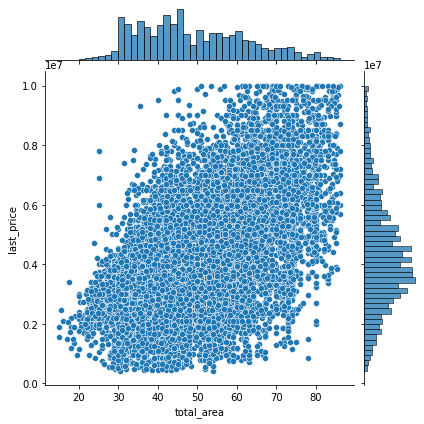

Коэффициент корреляции Пирсона: 0.4299


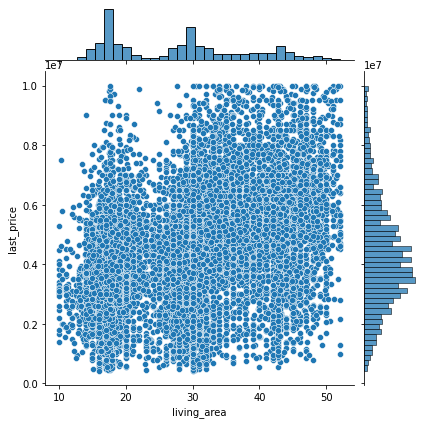

Коэффициент корреляции Пирсона: 0.3869


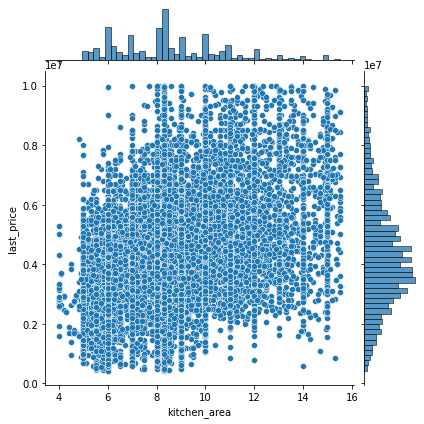

In [46]:
sns.jointplot(x=data_research.total_area, y=data_research.last_price)
print(f'Коэффициент корреляции Пирсона:', 
      data_research.corr(method='pearson')['total_area']['last_price'].round(4))
plt.show()
sns.jointplot(x=data_research.living_area, y=data_research.last_price)
print(f'Коэффициент корреляции Пирсона:', 
      data_research.corr(method='pearson')['living_area']['last_price'].round(4))
plt.show()
sns.jointplot(x=data_research.kitchen_area, y=data_research.last_price)
print(f'Коэффициент корреляции Пирсона:', 
      data_research.corr(method='pearson')['kitchen_area']['last_price'].round(4))

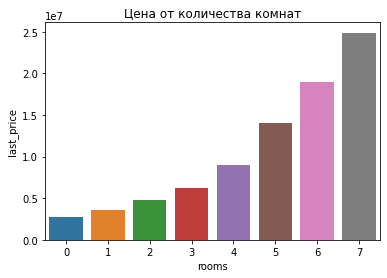

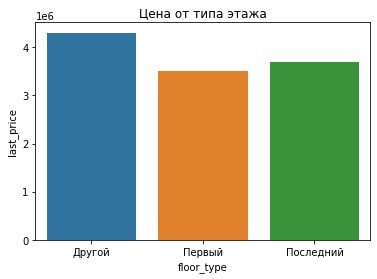

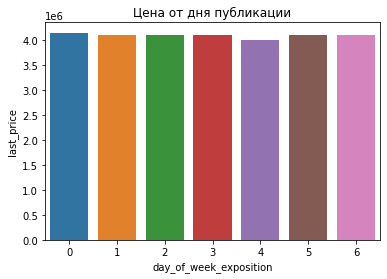

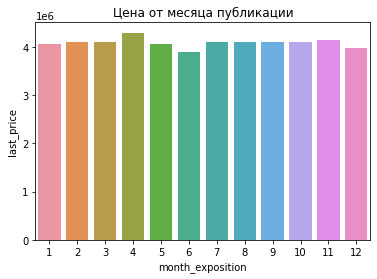

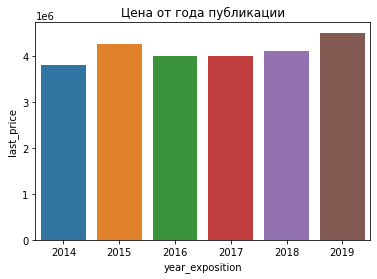

In [47]:
ax = plt.axes()
rooms_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc='median').query('rooms <= 7')
sns.barplot(x = rooms_pivot.index, y = rooms_pivot.last_price, ax=ax)
ax.set_title('Цена от количества комнат')
plt.show()

ax = plt.axes()
floor_type_pivot = data_research.pivot_table(index='floor_type', values='last_price', aggfunc='median')
sns.barplot(x = floor_type_pivot.index, y = floor_type_pivot.last_price, ax=ax)
ax.set_title('Цена от типа этажа')
plt.show()

ax = plt.axes()
day_of_week_exposition_pivot = data_research.pivot_table(index='day_of_week_exposition', values='last_price', aggfunc='median')
sns.barplot(x = day_of_week_exposition_pivot.index, y = day_of_week_exposition_pivot.last_price, ax=ax)
ax.set_title('Цена от дня публикации')
plt.show()

ax = plt.axes()
month_exposition_pivot = data_research.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
sns.barplot(x = month_exposition_pivot.index, y = month_exposition_pivot.last_price, ax=ax)
ax.set_title('Цена от месяца публикации')
plt.show()

ax = plt.axes()
year_exposition_pivot = data_research.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
sns.barplot(x = year_exposition_pivot.index, y = year_exposition_pivot.last_price, ax=ax)
ax.set_title('Цена от года публикации')
plt.show()

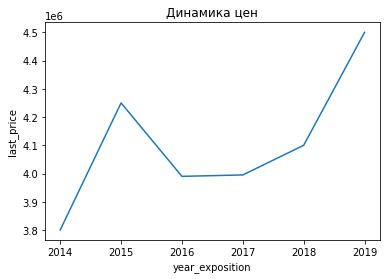

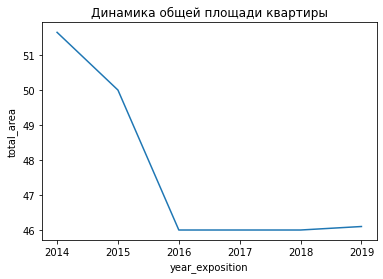

In [48]:
total_area_pivot = data_research.pivot_table(index='year_exposition', values=['total_area', 'last_price'], aggfunc='median')

ax = plt.axes()
sns.lineplot(data = total_area_pivot, x = total_area_pivot.index, y= total_area_pivot.last_price, ax=ax)
ax.set_title('Динамика цен')
plt.show()

ax = plt.axes()
sns.lineplot(data = total_area_pivot, x = total_area_pivot.index, y= total_area_pivot.total_area, ax=ax, ci='-o')
ax.set_title('Динамика общей площади квартиры')
plt.show()

**Выводы**:
   * Не смотря на большой разброс, по смещению видно, что суммарная площадь больше влияет на цену, чем жилая площадь или площадь кухни по отдельности.
   * Нелинейная положительная связь между количеством комнат и ценой.
   * Квартиры не на первом и не на последнем этаже стоят в среднем дороже.
   * Дни недели практически никак не влияют на цену.
   * Дороже всего квартиры в апреле, но к концу весны и до середины лета цены немного снижаются.
   * В рассматриваемом периоде с 2014 по 2019 видно, что рост цен "сдерживался" уменьшением общей площади квартир. В 2016 года цены и общая площадь застабилизировались, но уже с 2017 года цены опять пошли вверх при незначительном росте общей площади.

#### Задание 3.

In [49]:
city_list = data_research.locality_name.value_counts().keys()[:10]
data_city_research = data_research.query('locality_name in @city_list')
data_city_research_pivot = data_city_research.pivot_table(index='locality_name', values='price_per_meter', aggfunc='median')

In [50]:
data_city_research_pivot.sort_values(by='price_per_meter', ascending=False)

,price_per_meter
locality_name,
санкт-петербург,100427.350427
пушкин,100000.000000
деревня кудрово,92662.989300
посёлок мурино,86111.111111
посёлок шушары,77551.020408
деревня новое девяткино,75236.246673
красное село,73418.803419
гатчина,67796.610169
всеволожск,65737.874097


**Вывод**. По медианным значениям, самое дорогое жилье в Санкт-Петербурге, самое дешевое в Выборге.

#### Задание 4.

In [51]:
data_peterburg_research = data_research.query(
    'locality_name == "санкт-петербург" and cityCenters_nearest_km.isnull()==False')
data_peterburg_research['cityCenters_nearest_km'] = data_peterburg_research['cityCenters_nearest_km'].astype(int)

/tmp/ipykernel_536/3634245458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_peterburg_research['cityCenters_nearest_km'] = data_peterburg_research['cityCenters_nearest_km'].astype(int)


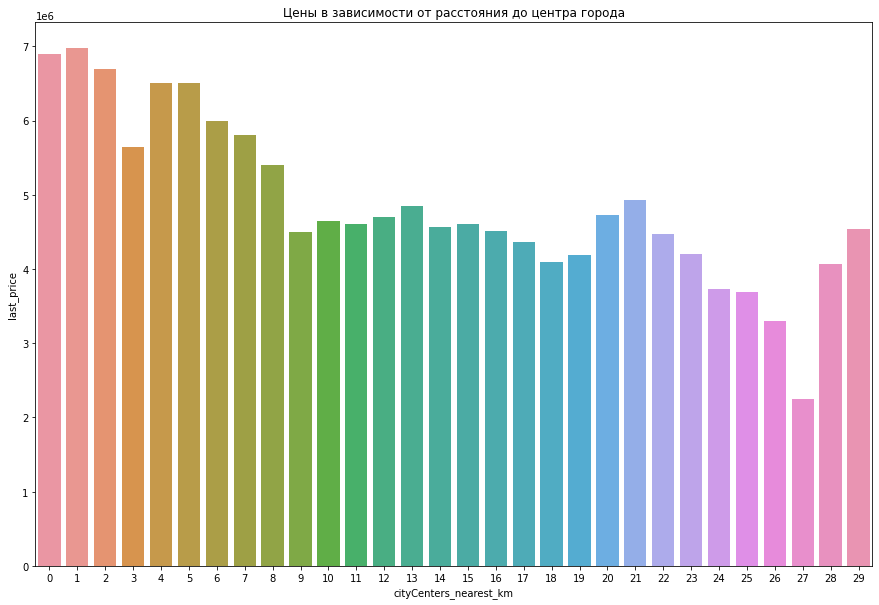

In [52]:
data_peterburg_research_pivot = data_peterburg_research.pivot_table(
    index='cityCenters_nearest_km', values='last_price', aggfunc='median')
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x = data_peterburg_research_pivot.index, y = data_peterburg_research_pivot.last_price, ax = ax, )
ax.set_title('Цены в зависимости от расстояния до центра города')
plt.show()

**Вывод.** Цена падает с увеличением расстояния от центра. Выбивающиеся значения в радиусе 20 км и 27 км могут говорить о налиичии благоприятных и неблагоприятных районов в этой области.

### Общий вывод

1. **Проведено первичное ознакомление с данными.**
    * Выявлены "выбросы".
    * Выявлены пропуски в данных. Много пропущенных данных в стобцах "аппартаменты" (88% пропущенных значений), "расстояние до ближайшего парка"(66% пропущенных значений) и "расстояние до ближайшего водоема"(62% пропущенных значений).
    * Проведен первичный анализ зависимостей между столбцами датасета. Наибольшая корреляция цены (для необработанного датасета) оказалась с общей площадью (0.7)
<br></br>
2. **Выполнена предобработка данных.**
    * Выполнено исключение "выбросов". В основном они связаны с единичным дорогим жильем, а также ошибками в данных. После этой операции число объектов сократилось с 23699 до 15868 или на 33%, что вполне достаточно, для дальнейшего исследования.
    * Частично запонены пропуски в данных, там где это возможно с учетом некоторых допущений.
    * Исключены как явные, так и неявные дубликаты.
<br></br>
3. **Добалены новые столбцы**.
<br></br>
4. **Проведено исследование зависимостей цены от разных факторов.**
    * Цена прямо и довольно сильно зависит от общей площади, количества комнат.
    * Цена обратно зависит от расстояния до центра города.
    * Цена почти не зависит от дня недели публикации объявления, слабо зависит от месяца публикации.
    * В рассматриваемом периоде с 2014 по 2019 видно, что рост цен "сдерживался" уменьшением общей площади квартир. В 2016 года цены и общая площадь застабилизировались, но уже с 2017 года цены опять пошли вверх при незначительном росте общей площади.
    
5. _Если исходить только из этого датасета_, то из-за продолжающегося роста цен необходимо  наращивать объемы строительства нового жилья, при этом весьма сомнительно, что дальнейшее уменьшение общей площади квартир приведет к снижению цен на них.